# Strategic play by the team in all quarters

*Synopsis*: This notebook studies the second extension which challenges the assumption made in the "base model" (see, *base_model_notebook.ipynb*) that an exogenously given constant fraction of the effort reserve is used up by the team, throughout the first three quarters combined. The manager is allowed to act strategically during the first three quarters (Q1 through to Q3 combined) as well. Interestingly,  the (optimal) energy used in the first three quarters peaks at about 75%. This is not obvious to begin with: one might think perhaps to put in a greater effort in the first three quarters to get a large lead. Allowing the coach to have greater control can indeed be helpful (the *EWR* is higher compared to the base model), as it
allows the manager to decide when facing a team that has high energy, if he/she may wish to “not bother” and save its energy instead.

---


## 1. Model description
In this notebook, we relax the assumption on $\alpha$, which recall was the fraction of energy used by the *team* during the first three quarters and was taken to be exogenously given. We instead allow for the coach to act strategically during the first three quarters (considered together) as well.  Recall that $T$ denotes the total number of *games*  to be played by the *team* in the season and is indexed by $t$. Effort (energy) reserves of  the *team* and the *field*, are denoted respectively by $e^P$ and $e^F$. Score-difference (*advantage*) at the end of the third quarter (denoted by $A$) is probabilistically determined as a function of effort exerted by the teams throughout the first three quarters combined. 

The field is assumed to split energy equally over all quarters. At the start of each game, energy reserves are realized. For each game $t$, there are now two decision making points: (1) at the beginning of the game, when the coach decides how much energy (denoted by $x$) to have his team spend in the first three quarters ($Q1$ to $Q3$ combined), as a function of $e^F$ and $e^P$ and; (2) at the start of $Q4$ after observing the advantage, the coach decides, out of the remaining energy  $e^P - \;x$ in the game, how much to  save (denoted by $r$) in consideration of future games versus how much to use in $Q4$ to win the current game. Let $Q^{<4}$ and  $Q^4$ denote the above two decision making points (henceforth, *rounds*) in every game.

The above-described problem can again be  modelled as a *Markov Decision Process*, but this time with $2 \times T$ rounds, *two* rounds (one each for  $Q^{<4}$ and  $Q^4$) for every game $t \in T$.
The *state* variable at the start of round $Q^{<4}$ of game $t$ is a pair $s_t^{Q^{<4}} = (e^F_{t}, e^P_{t})$ where,  energy reserves $e^P_t,$ $e^F_t \in [0,1]$. The action variable in round $Q^{<4}$ of game $t$ is $x_t \leq e_t^P$, which denotes the energy used in quarter $Q1$ to $Q3$. Given action $x_t$, the state (available energy and advantage) at the start of round $Q^{4}$ of game $t$ then transitions to $s_t^{Q^4} = (\frac{e^F_{t}}{4}, e^P_{t} - x_t, \; A_t)$ where, advantage $A_{t} $ is  distributed on $\{-3p,... ,0 ,..., 3p\}$ (where, $p > 0$ denotes the maximum possible point (score) difference between teams in a quarter. Positive advantage denotes the team is ahead at the start of $Q4$) with  mass function $\eta( \;. \; | \;\;  0.75 e^{F}_{t},\; x_{t}) $. This is because the field divides energy equally across all quarters, and hence $75\%$ in first three quarters.  Let $S^{Q^{<4}} = [0,1]\times[0,1]$ and $S^{Q^4} = [0,\frac{1}{4}]\times[0,1]\times \{-3p, \cdots,3p\} $ respectively denote, the set of all possible $Q^{<4}$ and $Q^4$ states. $ S = S^{Q^{<4}} \times \; S^{Q^4} $ denotes the state space.  The assumption on the mass function $\eta$ remains the same as in the base model. The  action variable $r_t \leq e^P_{t} - x_t$ in round $Q^{4}$ of game $t$, denotes the energy saved in $Q4$ of game $t$. The reward function  at $Q4$ of game $t$ is as below:

$~$
$~$
$~$
$~$

**Reward function**

The team wins game $t$, if the cumulative score difference at the end of $Q4$ is positive.  The score difference in $Q4$ is stochastically determined as a function of effort choices by the team and the field in $Q4$. Formally, the stage reward for the team is simply  the probability of winning the game as a function of the state and the control.

$$
R\Big(\frac{e^F_{t}}{4},e^P_{t} - x_t, \; A_t, \; r_t \Big) =
\begin{cases}
P[\;\textbf{X}_4 + A_t > 0\;] + \frac{1}{2}P[\;\textbf{X}_4 + A_t = 0\;]   & \text{ , } A_t \in \{-p, -p+1, ... , p\}  \\
1 & \text{ , } A_t \in \{p+1, p+2, ... , 3p \}  \\
0 & \text{ , } A_t \in \{-3p, -3p+1, ... , -(p+1) \}  \\
\end{cases} 
$$

$~$

where, $ \textbf{X}_4$ denotes the score difference in Q4 and is discretely distributed on  $\{-p,... ,0 ,..., p\}$ having probability mass function  $\rho( \; \cdot  \; | \; e^P_t-x_t-r_t ,\; \frac{e^{F}_t}{4}) $.

$~$
Note, the way the field uses its remaining energy in Q4 is embedded in $\rho$. Also note that, if the cumulative scores are tied at the end of $Q4$, there is a probability half of the team winning. The tie-breaker can be a result of, for instance, the game going into overtime, with the teams evenly matched.


$~$
$~$
$~$
$~$
$~$

Energy reserves in game $ t+1 $ depend on action $ r_{t} $ in $Q4$ and a random shock unknown at period $ t $ as below: 

- $ e^F_{t+1}$ is continuously distributed on [0,1] with density $g$.
- $ e^P_{t+1}$ is continuously distributed on [0,1] with density $\mu( \; \cdot \; | \; r_t \;)$.

$~$
$~$
$~$
$~$
$~$


---

### The (Bellman) maximization problem that the Coach needs to solve

---

Let $ V^{Q^4}_t(s) $ denote the value function capturing the maximum attainable sum of current and expected future rewards given that the system is in state $s$ in round $Q^4$ of game $t$. 

Similarly, $ V^{Q^{<4}}_t(s) $ denotes the value function in state $s$ at the start of round $Q^{<4}$ of game $t$. Then the principle of optimality implies that the value functions must satisfy the *Bellman* equations: 

 
$$
V^{Q^4}_t\Big(\frac{e^F_t}{4},e^P_t-x_t,A_t\Big) =\;\; \max_{r \; \leq \; e^P_t - x_t} \bigg[ R\bigg(\frac{e_t^F}{4},e_t^P-x_t-r, A_t\bigg) + E\Big(V^{Q^{<4}}_{t+1}\big(e_{t+1}^F,e_{t+1}^P\big)\; \big| \;r\Big)\bigg]	 
$$

$~$
 
$$
V^{Q^{<4}}_t\big(e_t^F,e_t^P\big) \;\;\; =\;\; \max_{x \;\leq\; e^P_t} \;\sum_a V_{t}^{Q^4}\Big( \frac{e_t^{F}}{4}, e_t^{P} - x,\; a \Big) \eta \Big( \;a \; \Big| \; x, \frac{3e^F_t}{4}\Big)	 
$$

for all $e_t^F,\; e_t^P, \;A_t $ and $ t = 1, 2, ..., T.$

$~$
$~$
$~$
$~$

The tournament ends after *game* $T$, therefore we have: $$ V^{q}_{T+1}(s) = 0 \hspace{5mm}\forall \hspace{2mm} s \in S^{q} \;\;\forall \hspace{2mm} q \in \big\{Q^{<4}, Q^4 \big\}$$

---

$~$
$~$
$~$
$~$
$~$
$~$
$~$


$~$
$~$
$~$

## 2. Analysis and results
The optimization problem described above is solved computationally. We make specific choices for the previously described probability distributions governing the process. These, along with the particular choice of all parameters of the model are presented below:

- Total number of games, T = 80
- Effort reserve of *field*, $e^F$ $\; \sim \;$ Uniform $(0,1)$ 
- Effort reserve of *team*, $e^P$ $\; \sim \;$ Uniform $(r, 1)$ when saving in previous game is $r$ 
- Maximum absolute score difference in each quarter, $p \;= \;10$.
- Fraction of total effort that the team uses in the first three quarters, $\alpha \;=\; 0.7$
- Field divides available effort reserve equally across all four quarters in every game. Therefore, $\beta = 0.75$.
- Advantage (A) to team at the start of $Q4$ follows a binomial distribution with support $\{-30,-29,... , 0 ,... , 29, 30\}$ :
    - $A \; \sim \; $ Binomial $ \bigg(60, \frac{x}{x + \beta e^F}\bigg) \; - \; 30$  
- Score-difference in the fourth quarter ($X_4$) given effort exerted by the team in Q4 is $x$,  follows a binomial distribution with support $\{-10,... , 0 ,... , 10\}$):   
    - $X_4 \;\sim \;$ Binomial$ \bigg(20, \frac{e^P - x - r}{\;\; (e^P - x - r) \;+ \;(1-\beta)e^F \;\;}\bigg) \; - \; 10 $ 

$~$
$~$
$~$
$~$
$~$
$~$

--- 

In [1]:
import numpy as np
from scipy.stats import binom
import math
import matplotlib.pyplot as plt
import time 

$~$
$~$
$~$



Define $G := A + 30$,  where $A$ is the *advantage* at the start of Q4 as defined in formal model above.

$A$ ranges from -30 to 30, and consequently,  $G$ ranges from $0$ to $60$. 

Since I am going to use 'binom'  from *scipy.stats*, this 
transformation will be useful. One could alternatively make the necessary transformation directly at appropriate places 
without defing this new variable. 

$~$
$~$

####   Preliminary HELPER functions  that will be used in the Bellman optimization

In [2]:
# ====== STAGE REWARD   ====== #

def reward(G, y, x):
    N = 20
    if x == 0.0 and y == 0.0:
        x = 1.0
        y = 1.0
    if G == -10:
        return binom.pmf(20, N, x/(x+y))/2.0
    
    elif G == 10:
        return (1.0 - binom.pmf(0, N, x/(x+y))/2.0 ) ### P(X_4 > 0) + 1/2*P[X_4 = 0]
    
    elif np.isin(G, np.linspace(-9, 9,19)):
        return (1.0 -   binom.cdf(10 - G, N, x/(x+y)) + binom.pmf(10 - G, N, x/(x+y))/2.0) 
    
    elif np.isin(G, np.linspace(-30, -11,20)):
        return 0.0
    else:
        return 1.0
    

In [3]:
#        j : field effort index (1/4th of it used in Q4, embedded in the reward function)
#        i : team effort index (effort available in Q4 (state variable))
#        a : advantage (state variable)
#   energy : E_f and E_p already defined earlier in the code which is being used here.
# value_Q3 : input giving value at Q3 (numbers come from calculations/maximization done in game t+1 )


def max_bellman_Q4(j, i, adv, value_Q3):
    val = np.zeros(i + 1)
    for r in range(0, i+1):
        val[r] = reward(adv , (1/4.0)*E_f[j], E_p[i - r]) + (value_Q3[:,r:].sum())*(1/len(E_f)*(1/len(E_p[r:])))
    (value, opt_saving_index) = (np.max(val),np.argmax(val))    
    return((value,opt_saving_index))


In [4]:
def max_bellman_Q3(j, i, value_Q4):
    val = np.zeros(i + 1)
    for x in range(0, i+1):
        val[x] = sum(value_Q4[i-x,:]*P[:,j,x])
    (value_Q3, opt_effort_index) = (np.max(val),np.argmax(val)) 
    return((value_Q3,opt_effort_index))

In [5]:
#######  Value Matrix Initialization  


T = 80
G = 61
num_of_states_E_f = 100    ###### number of effort_grid_points
num_of_states_E_p = 100    ###### number of effort_grid_points


V_Q3   = np.zeros((T+2, num_of_states_E_f, num_of_states_E_p))
Opt_Q3 = np.zeros((T+2, num_of_states_E_f, num_of_states_E_p))  

V_Q4_interim   = np.zeros((T+2, num_of_states_E_f, num_of_states_E_p, G))
Opt_Q4_interim = np.zeros((T+2, num_of_states_E_f, num_of_states_E_p, G))


In [7]:
s_0 = 0.0  # Recall that the support of effort reserves is [0, 1]. 
s_n = 1.0

beta = 3/4.0  ## field spends beta*E_f in first three quarters

E_f = np.linspace(s_0, s_n, num = num_of_states_E_f)
E_p = np.linspace(s_0, s_n, num = num_of_states_E_p)

                           #  ====   DISTRIBUTION OF 'G'  ==== #
    
#######   Recall that, given E_f and  E_p,  'A'  follows the Binomial distribution  and therefore so does 'G' := 'A' + 30.
#######   P[:, j, i ] evaluated below gives conditional distribution of ADVANTAGE given effort levels.  
#######    where,    P[a, j, i ]  =  P[a | 3/4*E_f[j], E_p[i]]                       


P = np.zeros((G, num_of_states_E_f, num_of_states_E_p)) ## P = np.zeros((G, E_f, E_p))

for i in range(0,len(E_p)):
    for j in range(0, len(E_f)):
        if i == 0 :
            if j == 0:
                p = 0.5
            else :
                p = 0.0
        else:
            p = E_p[i]/(E_p[i] + (beta*E_f[j]))   ######## FIELD uses 3/4th of it's effort in first three quarters  ####
            
        for g in range(0, 61):
            P[g,j, i] = binom.pmf(g, 60, p)

$~$
$~$
$~$

---
### Backward Induction  (Bellman)

---

In [13]:
for t in range(T,0,-1):   ## Loop over Games in the season (backwards) ##
#     print (time.ctime(), " t = ",t)   
    for j in range(0, len(E_f)):    ## Loop over FIELD effort levels ##
        ### next two loops -  visits to ALL possible Q4 states ###
        for k in range(0, len(E_p)): ## Loop over TEAM effort levels ##
            for a in range(0,61):
                ### Maximisation at Q4 for each possible state (e_P,a) for fixed e_F (j) ###
                (val_Q4_interim , opt_saving_Q4_index) = max_bellman_Q4(j, k, a-30, V_Q3[t+1,:,:])
                V_Q4_interim[t,j,k,a]    =  val_Q4_interim
                Opt_Q4_interim[t,j,k,a]  =  E_p[opt_saving_Q4_index]  ### remember it is optimal SAVING (not energy used in Q4)
               
        for i in range(0,len(E_p)):  ## Loop over TEAM effort levels ## 
            (val_Q3 , opt_used_Q3_index) = max_bellman_Q3(j, i, V_Q4_interim[t,j,:(i+1),:])
            V_Q3[t,j,i]     =  val_Q3
            Opt_Q3[t,j,i]   =  E_p[opt_used_Q3_index] 
            
print ( "\n Voila" )            


 Voila


---

$~$
$~$

## 2.1 Visualizing results



$~$
$~$
$~$

In [9]:
from numpy import *
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [10]:
##### Helper function to be used in the visualizations  #####
def my_surface_plot(axis, x, y, z, label_to_use):
    c = axis.plot_surface(x, y, z, label=label_to_use)
    c._facecolors2d=c._facecolors3d
    c._edgecolors2d=c._edgecolors3d
    return 

$~$
$~$
$~$
--- 
### 2.1.1 First three Quarters: 
#### Expected Win Rate (EWR) at the start of $Q1$ and Optimal Action in $Q1-Q3$
---


<IPython.core.display.Javascript object>


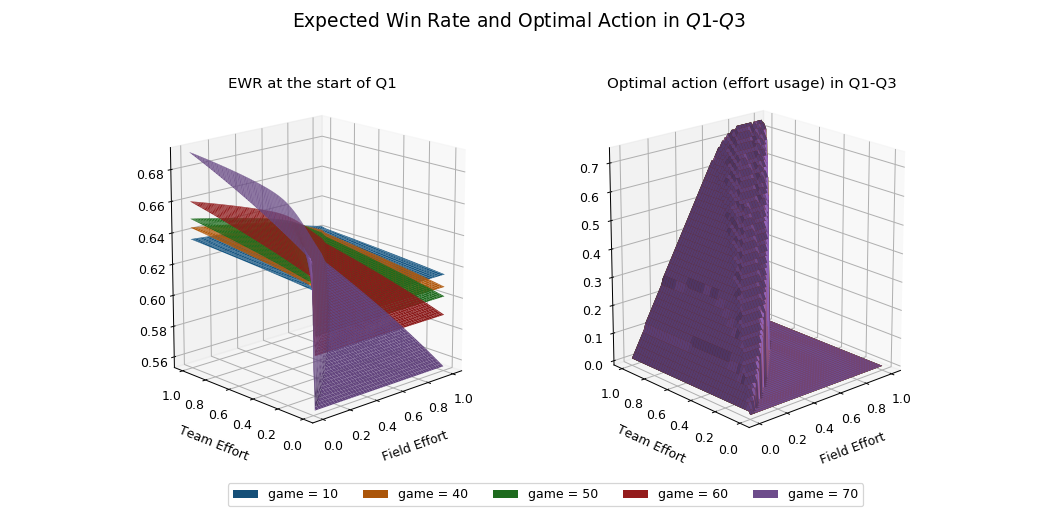

In [12]:
games = [10, 40, 50, 60, 70]   ## Array consisting of the games to be plotted. A game correspond to the variable 't' in the model.


x,y = mgrid[0:len(E_p), 0:len(E_p)]  ###### Effort meshgrid  ######
fig = plt.figure()

## EWR at the start of Q1
axis_EWR = fig.add_subplot(121,projection='3d',xlabel="\nField Effort", ylabel="\nTeam Effort")
for game in games:
    EWR = V_Q3[game,x,y]/(T - game +1)
    my_surface_plot(axis_EWR, E_f[x], E_p[y], EWR, "game = {}".format(game))

axis_EWR.set_title('EWR at the start of Q1')
axis_EWR.legend(ncol=5, bbox_to_anchor=(0.25, -0.02),  loc = 'upper left')


## Optimal action (effort usage) in Q1-Q3
axis_optQ1_Q3 = fig.add_subplot(122,projection='3d',xlabel="\nField Effort", ylabel="\nTeam Effort")
for game in games:
    optQ1_Q3 = Opt_Q3[game,x,y]
    my_surface_plot(axis_optQ1_Q3, E_f[x], E_p[y], optQ1_Q3, "game {}".format(game))
axis_optQ1_Q3.set_title('Optimal action (effort usage) in Q1-Q3')
# axis_optQ1_Q3.legend(ncol=5, bbox_to_anchor=(0.5, -0.07),  loc = 'best')



fig.suptitle('Expected Win Rate and Optimal Action in $Q1$-$Q3$', fontsize=15)

plt.show()

**Remarks:**

*EWR at the start of $Q1$*
-  The range of EWR shrinks as we go earlier in the season, similar to what was observed in the base model.
-  Relative strengths between the teams play a role in determining EWR. Starting the game as the relatively stronger team is more valuable when there are fewer games remaining. However, the value of  starting as the relatively weaker team gets increasingly worse as one proceeds through the season.

*Optimal action in $Q1 - Q3$*
- The optimal action (energy used in Q1-Q3) is highly insensitive to the stage in the season.
- If the relative strength between the teams is tilted in favour of the coach, the optimal action weakly increases with  field's starting strength. Also it is interesting to note, the optimal energy used in the first three quarters never exceeds $0.75$ no matter how strong the team starts the game. This is not an obvious deduction at the beginning as one might think that it could perhaps be optimal to exert higher effort during the first three quarters and gain a strong lead. However, we see that it is not the case.
- If the opponent is relatively stronger, it is optimal to save up entirely for the last quarter (there is a sharp drop to zero). Note that, an interpretation of  “effort” in our model is from the point of view of resting or limiting minutes of star players, which is indeed something coaches consider frequently. So “putting zero effort” need not really mean the players on the field do not try, but rather that the coach decides to rest his stars.

$~$
$~$
$~$

$~$
$~$
$~$



$~$
$~$
$~$


### 2.1.2 Last quarter ($Q4$)


---

#### Expected Win Rate at the start of Q4
In the figure below, we visualize *EWR* at the start of $Q4$ at three different **advantage** scenarios: 
- The team is **ahead** at the start of Q4, i.e., the score-difference is in favour of the team.
- The scores are **even** at the start of Q4.
- The team is **behind** at the start of Q4, i.e., the score-difference is in favour of the field.

---

<IPython.core.display.Javascript object>


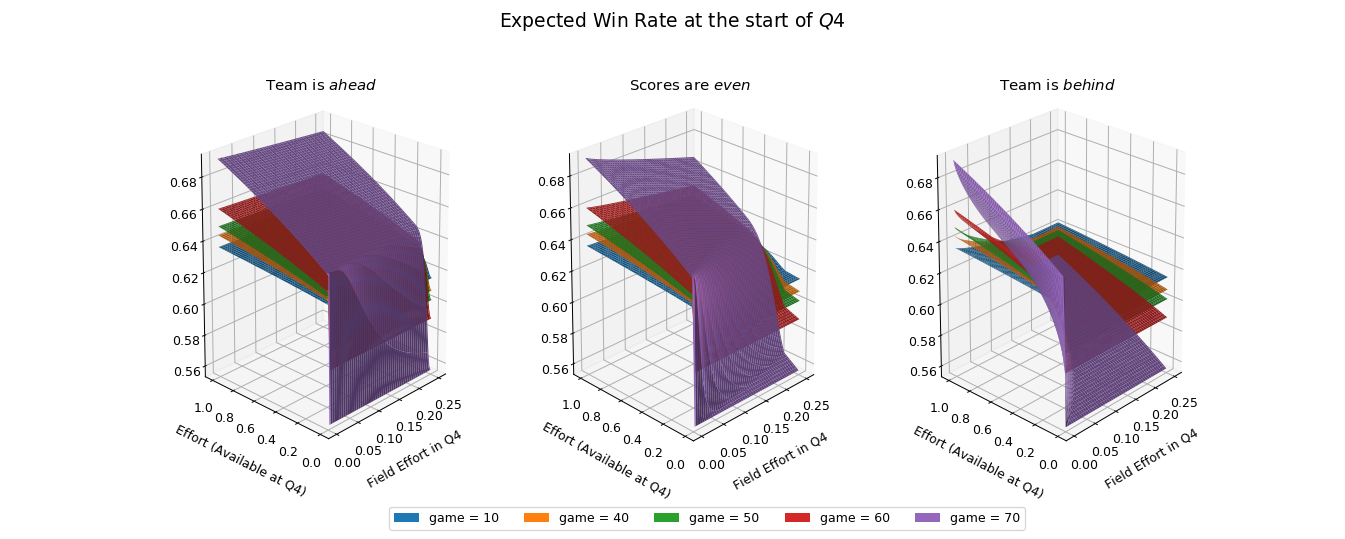

In [25]:
games = [10, 40, 50, 60, 70]   ## Array consisting of the games to be plotted. A game correspond to the variable 't' in the model.
adv_ahead , adv_even, adv_behind = 37, 30, 23     ## three advantage scenarios

x,y = mgrid[0:len(E_p), 0:len(E_p)]  ###### Effort meshgrid  ######
fig = plt.figure()

## Advantage: AHEAD
axis_ahead = fig.add_subplot(131,projection='3d',xlabel="\nField Effort in Q4", ylabel="\nEffort (Available at Q4)")
axis_ahead.set_title('Team is $ahead$')
for game in games:
    EWR_Q4 = V_Q4_interim[game,x,y,adv_ahead]/(T - game +1)
    my_surface_plot(axis_ahead, E_f[x]*0.25, E_p[y], EWR_Q4, "game = {}".format(game))
axis_ahead.legend(ncol=5, bbox_to_anchor=(0.70, -0.05),  loc = 'upper left')    
    

## Advantage: EVEN
axis_even = fig.add_subplot(132,projection='3d',xlabel="\nField Effort in Q4", ylabel="\nEffort (Available at Q4)")
for game in games:
    EWR_Q4 = V_Q4_interim[game,x,y,adv_even]/(T - game +1)
    my_surface_plot(axis_even, E_f[x]*0.25, E_p[y], EWR_Q4, "game {}".format(game))
axis_even.set_title('Scores are $even$')
# axis_even.legend(ncol=5, bbox_to_anchor=(-0.20, -0.05),  loc = 'upper left')

## Advantage: BEHIND
axis_behind = fig.add_subplot(133,projection='3d', xlabel="\nField Effort in Q4", ylabel="\nEffort (Available at Q4)")
for game in games:
    EWR_Q4 = V_Q4_interim[game,x,y,adv_behind]/(T - game +1)
    my_surface_plot(axis_behind, E_f[x]*0.25, E_p[y], EWR_Q4, "game = {}".format(game))
axis_behind.set_title('Team is $behind$')

fig.suptitle('Expected Win Rate at the start of $Q4$', fontsize=15)

plt.show()

**Remarks:**

-  Note the asymmetry in the possible remaining energy levels of the teams. 
-  If the team is well *ahead* at the start of $Q4$, the  difference between the teams in terms of energy available at $Q4$  do not affect EWR; except when, the team starts $Q4$ with very low energy (close to zero). As long as the team does not start $Q4$ with energy close to zero, the value of being *ahead* at the start of $Q4$ increases as one proceeds through the season.
- If the team is well *behind* at the start of $Q4$, the available-energy difference between the teams does not affect EWR; except if the field starts $Q4$ with a very low reserve (close to zero). If field's energy level at $Q4$ is not very low, the EWR decreases as one proceeds through the season. If field's energy level at $Q4$ is very low, EWR of starting $Q4$ very high in energy reserve increases as we progress into the season.
- If scores are *even* at the start of $Q4$,  available-energy difference between the teams plays a role in determining EWR.  The EWR of starting $Q4$ as the relatively weaker team is increasingly worse, as one heads to the end of the season. The EWR of starting  $Q4$ as the relatively stronger team increases as we proceed through the season. Once the team's available energy at $Q4$ exceeds $0.25$ (the highest energy level that the field can start $Q4$ with); the energy-difference does affect EWR any longer, only the time in the season matters.
 



$~$
$~$
$~$

---
#### Optimal Action in $Q4$


In the figure below, we visualize *Optimal Energy Usage* at the start of $Q4$ at three different **advantage** scenarios: 
- The team is **ahead** at the start of Q4, i.e., the score-difference is in favour of the team.
- The scores are **even** at the start of Q4.
- The team is **behind** at the start of Q4, i.e., the score-difference is in favour of the field.

---

<IPython.core.display.Javascript object>


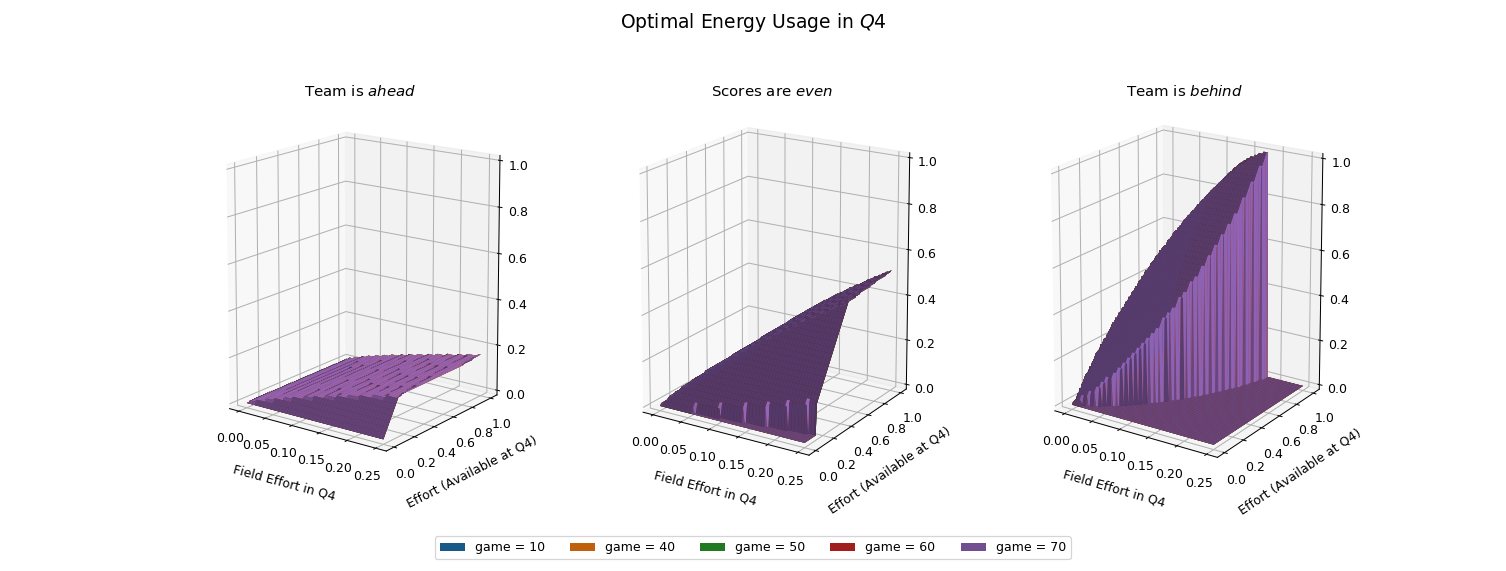

In [33]:
games = [10, 40, 50, 60, 70]   ## Array consisting of the games to be plotted. A game correspond to the variable 't' in the model.
adv_ahead , adv_even, adv_behind = 37, 30, 23     ## three advantage scenarios

x,y = mgrid[0:len(E_p), 0:len(E_p)]  ###### Effort meshgrid  ######
fig = plt.figure()

## Advantage: AHEAD
axis_ahead = fig.add_subplot(131,projection='3d',xlabel="\nField Effort in Q4", ylabel="\nEffort (Available at Q4)")
axis_ahead.set_title('Team is $ahead$')
for game in games:
    opt_Q4 = E_p[y] - Opt_Q4_interim[game,x,y,adv_ahead]
    my_surface_plot(axis_ahead, E_f[x]*0.25, E_p[y], opt_Q4, "game = {}".format(game))
axis_ahead.legend(ncol=5, bbox_to_anchor=(0.70, -0.05),  loc = 'upper left')
axis_ahead.set_zlim3d(0.0,1.0)

## Advantage: EVEN
axis_even = fig.add_subplot(132,projection='3d',xlabel="\nField Effort in Q4", ylabel="\nEffort (Available at Q4)")
for game in games:
    opt_Q4 = E_p[y] - Opt_Q4_interim[game,x,y,adv_even]
    my_surface_plot(axis_even, E_f[x]*0.25, E_p[y], opt_Q4, "game {}".format(game))
axis_even.set_title('Scores are $even$')
axis_even.set_zlim3d(0.0,1.0)

## Advantage: BEHIND
axis_behind = fig.add_subplot(133,projection='3d', xlabel="\nField Effort in Q4", ylabel="\nEffort (Available at Q4)")
for game in games:
    opt_Q4 = E_p[y] - Opt_Q4_interim[game,x,y,adv_behind]
    my_surface_plot(axis_behind, E_f[x]*0.25, E_p[y], opt_Q4, "game = {}".format(game))
axis_behind.set_title('Team is $behind$')

fig.suptitle('Optimal Energy Usage in $Q4$', fontsize=15)

plt.show()

**Remarks:**

- We can observe from the figure above that the optimal strategy is highly insensitive to the stage in the season.
- If the *advantage* at the start of $Q4$   is well in favour of the team, but the team starts with low energy in $Q4$, it optimal to use up the energy against a relatively  strong opponent. However, for every fixed energy of the field, starting $Q4$ with energy  approximately about $0.20$ and higher, the optimal action levels out and  saving energy becomes optimal. 
- If the *advantage* is *even* at the start of $Q4$, and the team starts $Q4$ low on energy, it is optimal to save all of it. If the team starts $Q4$ with moderate energy and higher, for every fixed energy of the field, the optimal action weakly increases with available energy at $Q4$ and eventually levels out beyond a threshold (depending on the field's energy).  
- If the *advantage* is *behind*  at the start of $Q4$, it is optimal to still use up energy in $Q4$ if the relative strength between the teams at $Q4$ is very very strongly in favour of the team. Otherwise, it is optimal to save all the available energy (there is a sharp drop to zero) . 

$~$
$~$
$~$
$~$
$~$
$~$




$~$
$~$
$~$
$~$
$~$
$~$

---

### 2.1.3 Optimal Strategies: Few specific scenarios 

In what follows, we dive deeper into the optimal strategies for three different initial energy levels of the team: 

- Team starts the game $strong$, i.e.,   $e^P = 0.8$
- Team starts the game $average$  i.e.,   $e^P = 0.5$
- Team starts the game $weak$     i.e.,   $e^P = 0.2$ 


We fix the game ($t=40$) for the rest of this subsection. Since the optimal action in $Q1-Q3$ is highly insensitive to which game in the season the team is in, the optimal action in $Q4$ therefore also remains highly insensitive to the game number. The analysis therefore reflective of other games as well, i.e., other values of $t$.

---


In [40]:
#####  Customized plotting function for the plots below.

def specific_scenario_plot(t, team_strength_fraction):
    game = t
    team_strength = int(len(E_p)*team_strength_fraction)
    effort = E_f

    ##### 'fig1' ####
    fig1 = plt.figure()
    axis_optQ1toQ3 = fig1.add_subplot(111, xlabel="Field Energy")
    labels = ['Energy used in $Q1$-$Q3$', 'Energy saved for $Q4$']
    colors = ['g', 'y']
    axis_optQ1toQ3.stackplot(effort, Opt_Q3[game,:,team_strength], E_p[team_strength]*np.ones(len(E_p)) - 
                             Opt_Q3[game,:,team_strength], labels=labels,colors=colors)
    axis_optQ1toQ3.legend()
    axis_optQ1toQ3.set_ylim(0.0,1.0)
    fig1.suptitle('Optimal Action in $Q1$-$Q3$ (Team energy, $e^P$ = ' +str(np.round(E_p[team_strength],1))+ ') \n ', fontsize=15)
    ##### end of 'fig1'  ######

    
    ##### HELPER function for 'fig2' ####
    def opt_action_Q4_plot(axis, team_eff_frac, field_eff_frac, title ):
        width = 0.45       # the width of the bars: can also be len(x) sequence
        advantage_axisticks = [a for a in range(-10,11)]


        effort_new = [i for i in E_p]  ### LIST to access location (index), .index does not work on np.arrays 
        effort_team_index = int(len(E_p)*team_eff_frac)  ## TEAM energy : high
        effort_field_index = int(len(E_p)*field_eff_frac) ## FIELD energy : high
        effort_field = np.round(E_f[effort_field_index],1)


        Q4_saved = np.zeros(G)
        loc_used_Q3 = effort_new.index(Opt_Q3[game,effort_field_index,effort_team_index])
        loc_saved_for_Q4 = effort_team_index - loc_used_Q3
        for a in range(0,61):
            Q4_saved[a] = Opt_Q4_interim[game,effort_field_index,loc_saved_for_Q4,a]


        Q4_used = np.ones(len(Q4_saved))*E_p[loc_saved_for_Q4] - Q4_saved
        Q4_used_new = Q4_used[20:41] 
        Q4_saved_new = Q4_saved[20:41]


        axis.bar(advantage_axisticks, Q4_used_new, width, label='Energy Used in Q4')
        axis.bar(advantage_axisticks, Q4_saved_new,  width, bottom =Q4_used_new, label='Energy Saved in Q4')
        axis.set_ylim(0.0, 1.0)
        axis.set_xlabel('$Advantage$ at the start of Q4',  fontsize=15)
        axis.set_title(title +str(effort_field), fontsize=15)
        axis.set_xticks(advantage_axisticks)
        return
    #### end of function #### 

    
    #### 'fig2' ####
    fig2 = plt.figure()
    
    ### field: strong
    axis_strong_opponent = fig2.add_subplot(131)
    title = 'Strong Opponent, $e^F$ = ' 
    opt_action_Q4_plot(axis_strong_opponent, team_strength_fraction, 0.8, title)

    ###  field: average
    axis_average_opponent = fig2.add_subplot(132)
    title = 'Average Opponent, $e^F$ = ' 
    opt_action_Q4_plot(axis_average_opponent, team_strength_fraction, 0.5, title)
    axis_average_opponent.legend()

    ###  field: weak
    axis_weak_opponent = fig2.add_subplot(133)
    title = 'Weak Opponent, $e^F$ = ' 
    opt_action_Q4_plot(axis_weak_opponent, team_strength_fraction, 0.2, title)

    fig2.suptitle('Optimal Action in $Q4$\n', fontsize=30)
    #### end of 'fig2' ####
    
    plt.show()

$~$
$~$
$~$
$~$
$~$
$~$


### Team starts the game $strong$

<IPython.core.display.Javascript object>


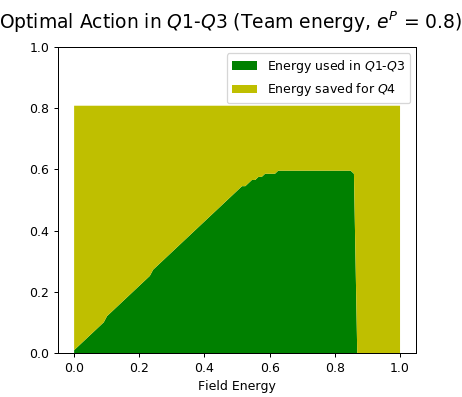

<IPython.core.display.Javascript object>


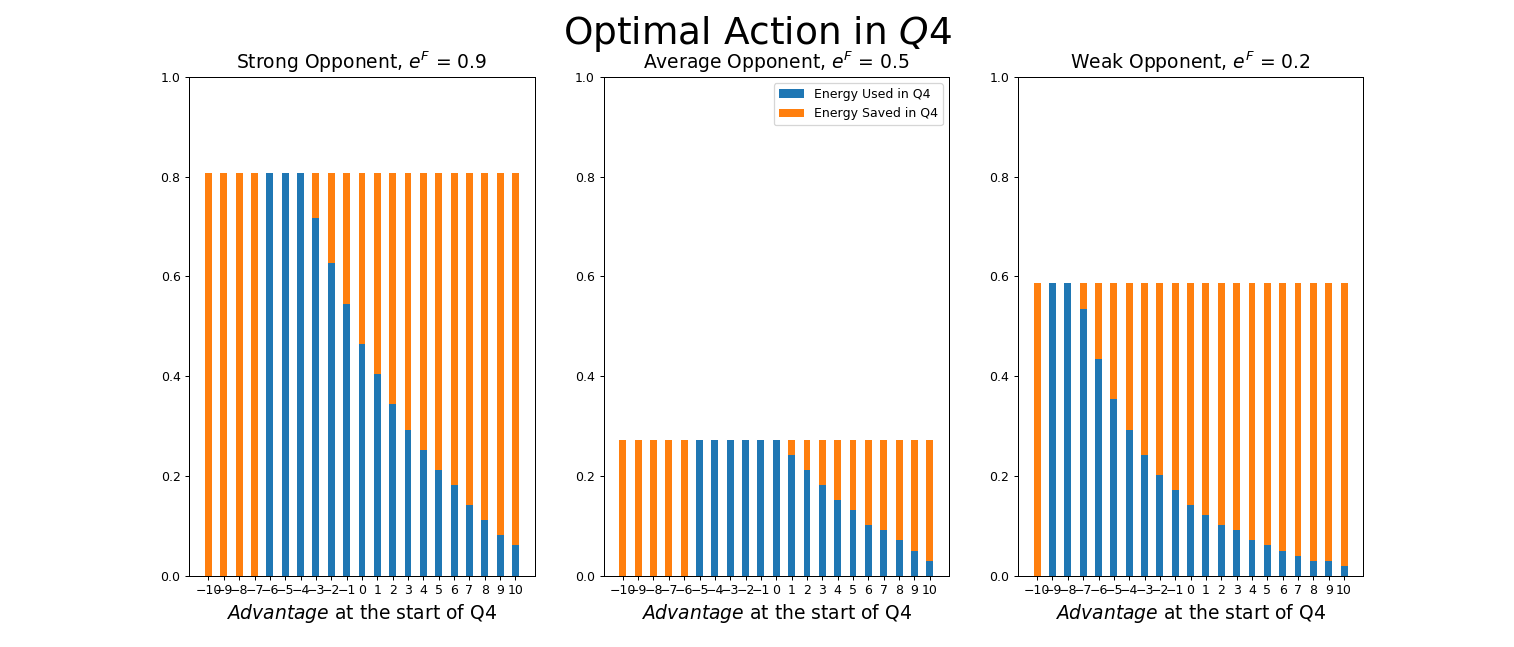

In [39]:
specific_scenario_plot(40, 0.8)

**Remarks:** 

*Optimal effort usage in $Q1 - Q3$ *
- The optimal action initially increases linearly with starting strength of the opponent, and then flattens out before sharply dropping  to zero, against a very strong opponent ($e^F$ $\approx 0.9$ and higher). 
- Surprisingly, against a very strong opponent, strategically saving up big for the end is profitable even if the team starts the game quite strong ($e^P = 0.8$). Allowing the team to be strategic about how much effort to use in the first three quarters can be helpful. Indeed, we have earlier seen that the EWR is higher than in the base model.

*Optimal action in $Q4$*

- The figure shows the optimal action in $Q4$ for different *advantage* scenarios that the team might face, and against a  *very strong*, *average* and *weak* opponent respectively.
- If the score-difference is not terribly bad, the coach can then try to overpower the strong opponent in the last quarter.
- Note, since the maximum possible score difference in a quarter was assumed to be $10$, *advantage* below $-10$ and above $10$ always calls for saving energy and is omitted from the presentation. We observe that it is indeed optimal to save for future games in a range of scenarios.

$~$
$~$
$~$



### Team starts the game $average$

<IPython.core.display.Javascript object>


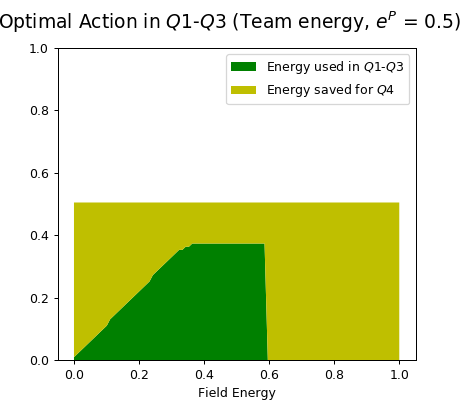

<IPython.core.display.Javascript object>


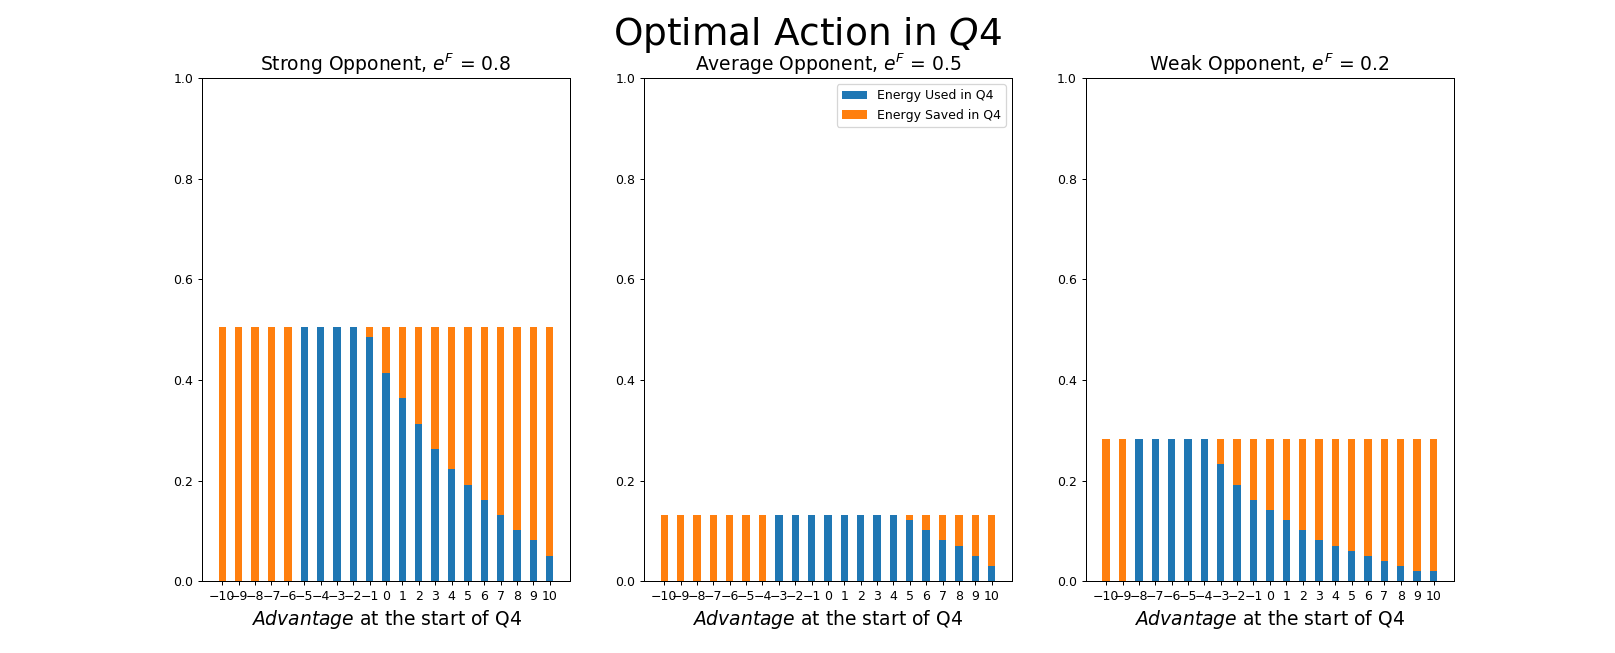

In [36]:
specific_scenario_plot(40, 0.5)

**Remarks:** 

*Optimal effort usage in $Q1 - Q3$ *
-  The optimal action initially increases linearly with  strength of the opponent, and then flattens out before discontinuously dropping  to zero, against a stronger opponent ($e^F$ $\approx 0.6$ and above). Once again we see that it is optimal for the coach when facing a team that has high energy to simply “not bother” and save its energy in the first three quarters. Depending on the score difference  at the start of $Q4$, the coach then decides whether it is worth investing or saving for later games.

*Optimal action in $Q4$*

- Similar conclusion as before hold here.
$~$
$~$
$~$
$~$



$~$
### Team starts the game $weak$

<IPython.core.display.Javascript object>


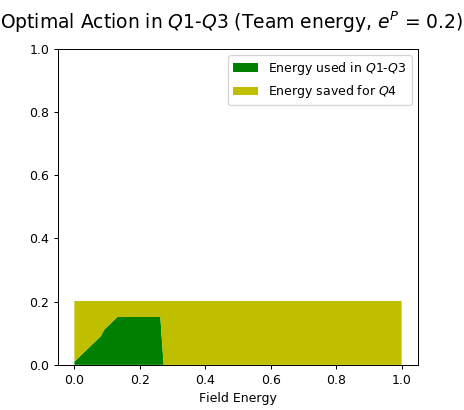

<IPython.core.display.Javascript object>


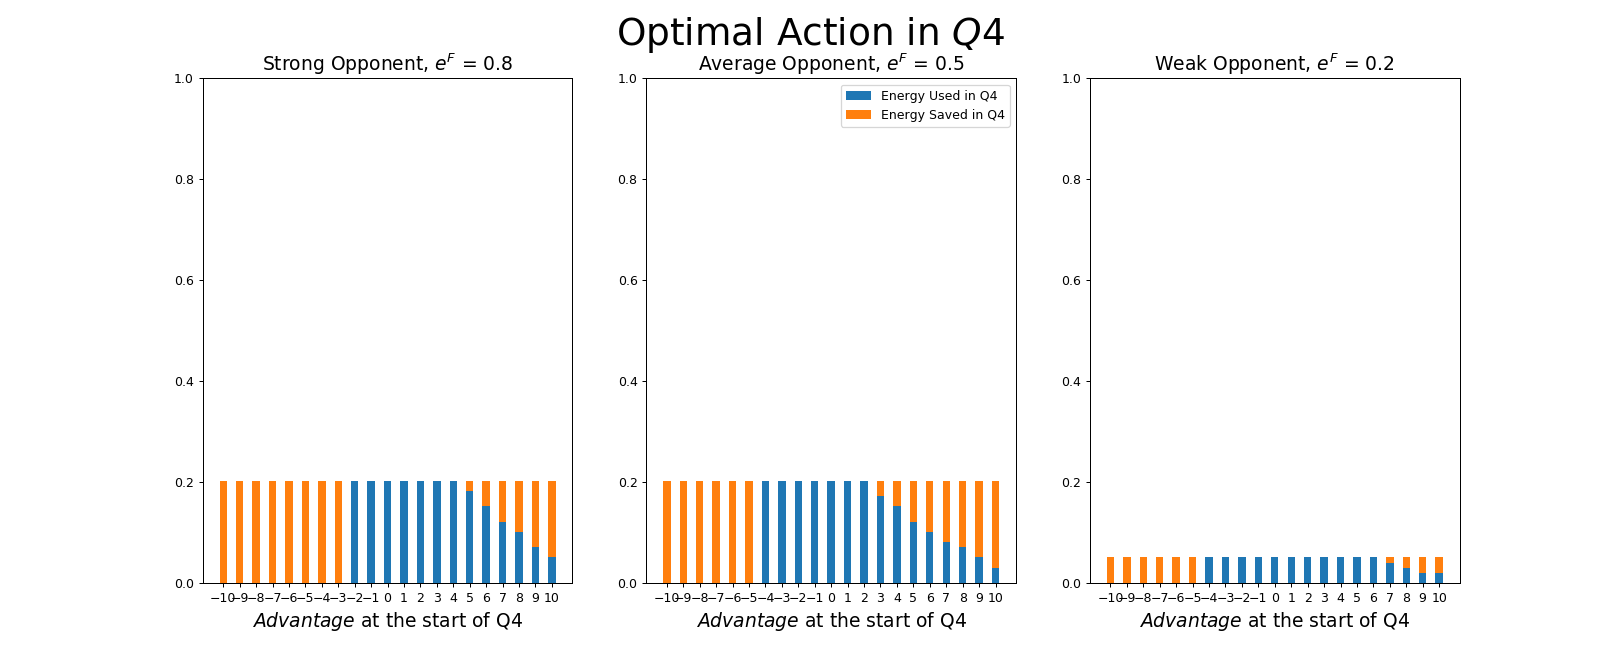

In [37]:
specific_scenario_plot(40, 0.2)

**Remarks:** 

*Optimal effort usage in $Q1 - Q3$ *
-  Similar to  the previous two cases, the optimal action again initially increases linearly with  strength of the opponent, and then flattens out before discontinuously dropping  to zero, against a stronger opponent.

*Optimal action in $Q4$*

- Similar conclusion as before hold here.